In [1]:
import os
from dotenv import load_dotenv, dotenv_values
from pprint import pprint


config = dotenv_values(".env")


azure_oai_key = config["AZURE_OPENAI_API_KEY"]
# api_base_url = config["AZURE_OPENAI_ENDPOINT"]
api_base_url = "http://localhost:8000/models-playground/multimodal-4o"

# deployment_name = config["AZURE_LLM_DEPLOYMENT_NAME"]
deployment_name = "multimodal-4o"
api_version = config["AZURE_OPENAI_API_VERSION"]

print(
    f"Azure OpenAI api key={azure_oai_key[0:3]}...{azure_oai_key[-5:]}"
)
print(
    f"Azure OpenAI api endpoint={api_base_url[0:17]}..."
)
print(f"Azure OpenAI deployment name={deployment_name[0:7]}...")
print(f"Azure OpenAI api version={api_version}")

Azure OpenAI api key=9b2...d67b3
Azure OpenAI api endpoint=http://localhost:...
Azure OpenAI deployment name=multimo...
Azure OpenAI api version=2023-07-01-preview


In [2]:
from langchain.chat_models import AzureChatOpenAI

llm = AzureChatOpenAI(
    openai_api_key=azure_oai_key,
    deployment_name=deployment_name,
    api_version=api_version,
    azure_endpoint=api_base_url,
)

P:\Repos\prompt_sail\venv\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `AzureChatOpenAI` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use langchain_openai.AzureChatOpenAI instead.
  warn_deprecated(


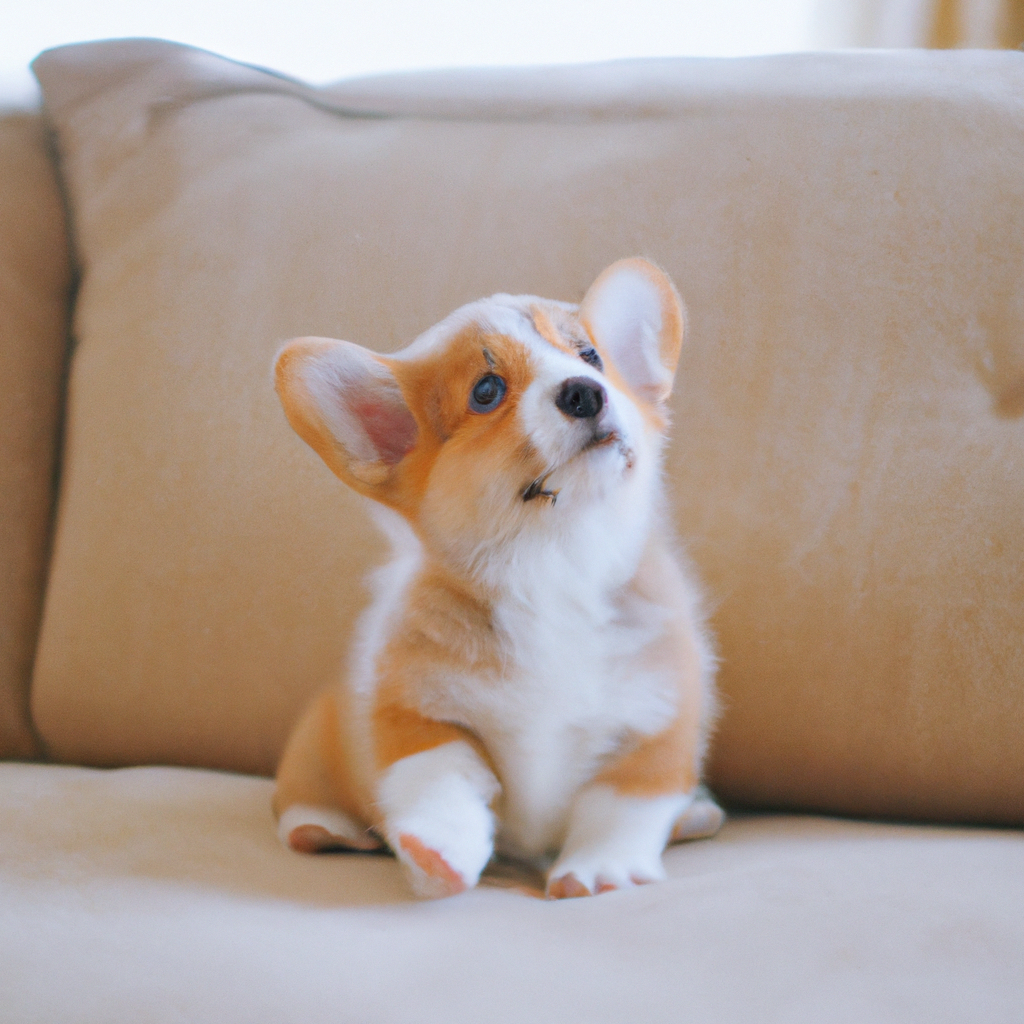

In [10]:

import base64

IMAGE_PATH = "example_image.png"
display(Image(IMAGE_PATH))

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown."},
        {"role": "user", "content": [
            {"type": "text", "text": "Describe the images as an alternative text"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
ai_message = llm.invoke(messages)

In [11]:
print(ai_message.content)

A young Corgi puppy sits on a beige sofa. The puppy has a fluffy coat with a mix of white and light brown fur, and its ears are perked up. The background is softly lit, creating a warm and cozy atmosphere.
